In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [2]:
# Read transaction data
df_transaction = pd.read_excel("D:/Data Analysis/Retail Sales Data Analysis Project/transaction_data.xlsx")
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [4]:
# Correct date format
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'], origin='1899-12-30', unit='D')

In [5]:
# Clean PROD_NAME into a new column 

# Step 1: Clean product name
def clean_product_name(name):
    name= name.lower()
    name= re.sub(r'[^a-z\s]', '',name)
    name=re.sub(r'\s+', ' ', name)
    name=re.sub(r'\bg\b', '',name)
    return name.strip()

df_transaction['PROD_NAME_CLEANED'] = df_transaction['PROD_NAME'].apply(clean_product_name)

# Define a function to get sorted word frequency
def get_clean_product_name(df, column_name):
    
    all_words = []

    for name in df[column_name].dropna().tolist():
        words = name.lower().split()
        for word in words:
            if re.fullmatch(r'[a-z]+', word):
                all_words.append(word)

    
    # Count word frequencies
    word_counts = Counter(all_words)

    # Return sorted list
    return word_counts.most_common()

sorted_word_freq = get_clean_product_name(df_transaction, 'PROD_NAME_CLEANED')

# Print top 15 words
for word, freq in sorted_word_freq[:15]:
    print(f"{word}: {freq}")


# Remove 'salsa' products from the DataFrame
df_transaction = df_transaction[~df_transaction['PROD_NAME_CLEANED'].str.contains('salsa' ,na=False)].copy()

chips: 49770
kettle: 41288
smiths: 28860
salt: 27976
cheese: 27890
pringles: 25102
doritos: 24962
crinkle: 23960
corn: 22063
original: 21560
cut: 20754
chip: 18645
salsa: 18094
chicken: 15407
sea: 14145


In [6]:
# summary 
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [7]:
df_transaction[df_transaction['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLEANED
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,dorito corn chp supreme
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,dorito corn chp supreme


In [8]:
df_transaction[df_transaction['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLEANED
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,dorito corn chp supreme
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,dorito corn chp supreme


In [9]:
df_transaction = df_transaction[df_transaction['LYLTY_CARD_NBR'] != 226000]

In [10]:
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [11]:
# Create a summary of transaction count by date.
transaction_count_by_date = df_transaction.groupby('DATE').size().reset_index(name='Transaction_Count')
transaction_count_by_date = transaction_count_by_date.sort_values(by='DATE')
print(transaction_count_by_date)

          DATE  Transaction_Count
0   2018-07-01                663
1   2018-07-02                650
2   2018-07-03                674
3   2018-07-04                669
4   2018-07-05                660
..         ...                ...
359 2019-06-26                657
360 2019-06-27                669
361 2019-06-28                673
362 2019-06-29                703
363 2019-06-30                704

[364 rows x 2 columns]


In [12]:
# create a column of dates that includes every day from 1 Jul 2018 to 30 Jun 2019, and join it onto the data to fill in the missing day.
full_date_range = pd.DataFrame({'DATE':pd.date_range(start='2018-07-01', end='2019-06-30')})
full_date_range

,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05
...,...
360,2019-06-26
361,2019-06-27
362,2019-06-28
363,2019-06-29


In [13]:
transaction_full = full_date_range.merge(transaction_count_by_date, on='DATE', how='left')
transaction_full

,DATE,Transaction_Count
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0
...,...,...
360,2019-06-26,657.0
361,2019-06-27,669.0
362,2019-06-28,673.0
363,2019-06-29,703.0


In [14]:
transaction_full['Transaction_Count'] = transaction_full['Transaction_Count'].fillna(0)

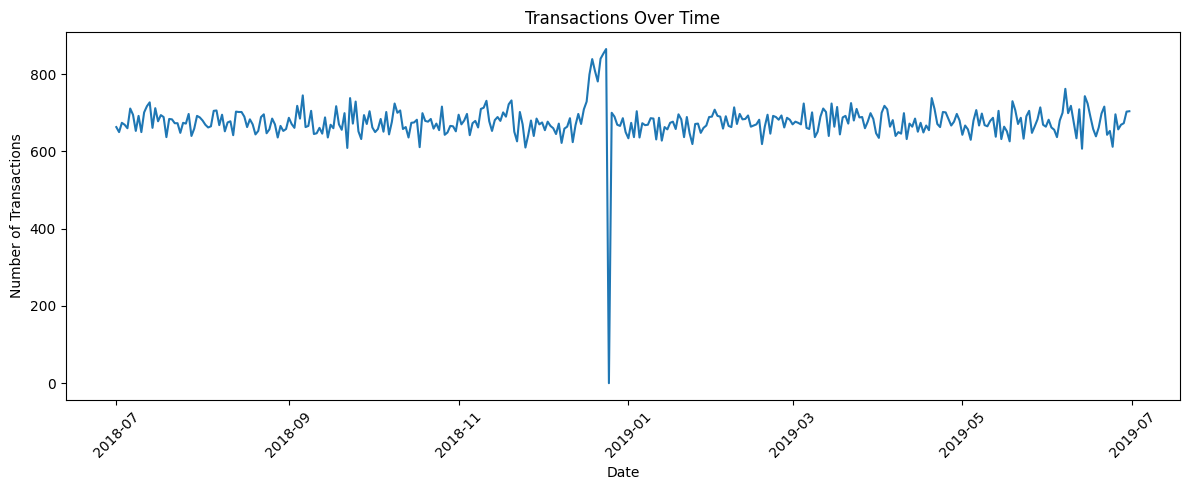

In [15]:
# Plot transactions over time
plt.figure(figsize=(12,5))
plt.plot(transaction_full['DATE'], transaction_full['Transaction_Count'])
plt.title("Transactions Over Time")
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("transactions_over_time.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# Filter to December and look at individual days
december_data = transaction_full[
    (transaction_full['DATE'] >= '2018-12-01') &
    (transaction_full['DATE'] <= '2018-12-31')
]

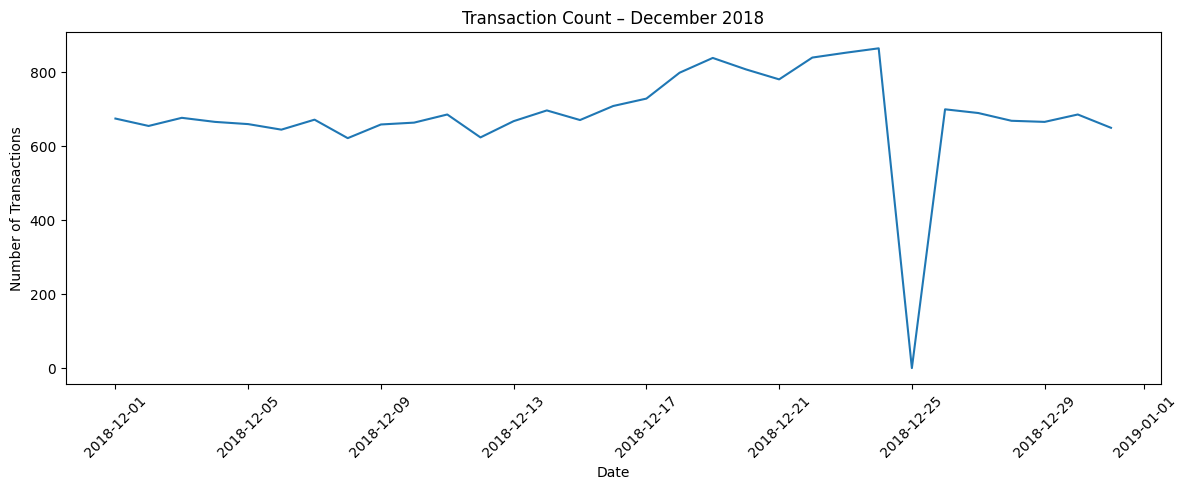

In [17]:
# Plot transactions over time (zoomed in to december)
plt.figure(figsize=(12,5))
plt.plot(december_data['DATE'], december_data['Transaction_Count'])
plt.title("Transaction Count – December 2018")
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("december_transactions_2018.png", dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# Extract Pack Size from product name into a new column
df_transaction['PACK_SIZE'] = df_transaction['PROD_NAME'].str.extract(r'(\d+)').astype(int)
df_transaction['PACK_SIZE'] 

0         175
1         175
2         170
3         175
4         150
         ... 
264831    175
264832    175
264833    170
264834    150
264835    175
Name: PACK_SIZE, Length: 246740, dtype: int64

In [19]:
# Let's check if the pack sizes look sensible
print(df_transaction['PACK_SIZE'].sort_values())

259246     70
259135     70
258984     70
258943     70
259305     70
         ... 
145130    380
145165    380
145111    380
41        380
145073    380
Name: PACK_SIZE, Length: 246740, dtype: int64


In [20]:
print(df_transaction['PACK_SIZE'].unique())

[175 170 150 330 210 270 220 125 110 134 380 180 165 135 250 200 160 190
  90  70]


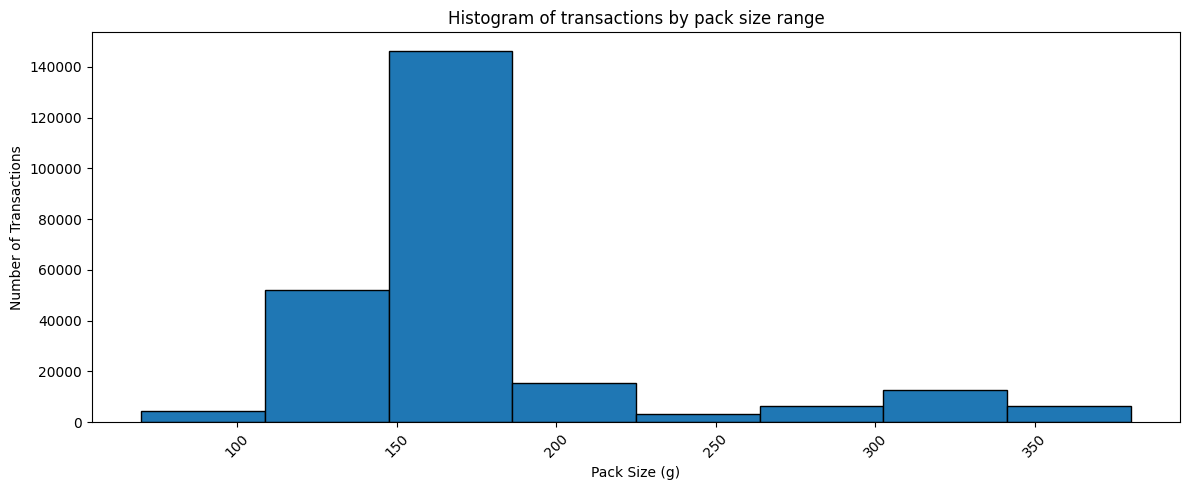

In [21]:
#  Plot a histogram showing the number of transactions by pack size.
plt.figure(figsize=(12,5))
plt.hist(df_transaction['PACK_SIZE'], bins= 8, edgecolor='black')
plt.title("Histogram of transactions by pack size range")
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("histogram_pack_size.png", dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Create a column which contains the brand of the product, by extracting it from the product name.
df_transaction['BRAND'] = df_transaction['PROD_NAME'].str.extract(r'^([A-Za-z]+)')
print(df_transaction['BRAND'].unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'RRD' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


In [23]:
# Clean brand names
df_transaction['BRAND'] = df_transaction['BRAND'].replace({
    'Red': 'RRD',
    'Natural': 'NATURAL CHIP COMPANY',
    'NATURAL': 'NATURAL CHIP COMPANY',
    'Smith': 'SMITHS',
    'Smiths': 'SMITHS',
    'GrnWves': 'GRAINWAVES',
    'Grain': 'GRAINWAVES',
    'Dorito': 'DORITOS',
    'Doritos': 'DORITOS',
    'Infzns': 'INFUZIONS',
    'Infuzions': 'INFUZIONS',
    'Woolworths': 'WOOLWORTHS',
    'WOOLWORTHS': 'WOOLWORTHS',
    'Snbts': 'SUNBITES',
    'Sunbites': 'SUNBITES'
})
df_transaction['BRAND'] = df_transaction['BRAND'].str.upper()
print(df_transaction['BRAND'].unique())

['NATURAL CHIP COMPANY' 'CCS' 'SMITHS' 'KETTLE' 'GRAINWAVES' 'DORITOS'
 'TWISTIES' 'WW' 'THINS' 'BURGER' 'NCC' 'CHEEZELS' 'INFUZIONS' 'RRD'
 'PRINGLES' 'TYRRELLS' 'COBS' 'FRENCH' 'TOSTITOS' 'CHEETOS' 'WOOLWORTHS'
 'SUNBITES']


## Examining customer data

In [24]:
# Read purchase data
df_purchase = pd.read_csv("D:/Data Analysis/Retail Sales Data Analysis Project/purchase_behaviour.csv")
df_purchase.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [25]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Merge transaction data to customer data
df_combined = pd.merge(df_transaction, df_purchase, how='left', on='LYLTY_CARD_NBR')
df_combined

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLEANED,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,natural chip compny seasaltg,175,NATURAL CHIP COMPANY,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,ccs nacho cheese,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,smiths crinkle cut chips chicken,170,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,smiths chip thinly screamonion,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,kettle tortilla chpshnyjlpno chili,150,KETTLE,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,kettle sweet chilli and sour cream,175,KETTLE,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,tostitos splash of lime,175,TOSTITOS,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,doritos mexicana,170,DORITOS,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,doritos corn chip mexican jalapeno,150,DORITOS,YOUNG SINGLES/COUPLES,Premium


In [27]:
# See if any transactions did not have a matched customer.
missing_customers = df_combined[df_combined['LIFESTAGE'].isna() | df_combined['PREMIUM_CUSTOMER'].isna()]
print(len(missing_customers))

0


In [28]:
df_combined[['LIFESTAGE', 'PREMIUM_CUSTOMER']].isna().sum()

LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

## Data analysis on customer segments

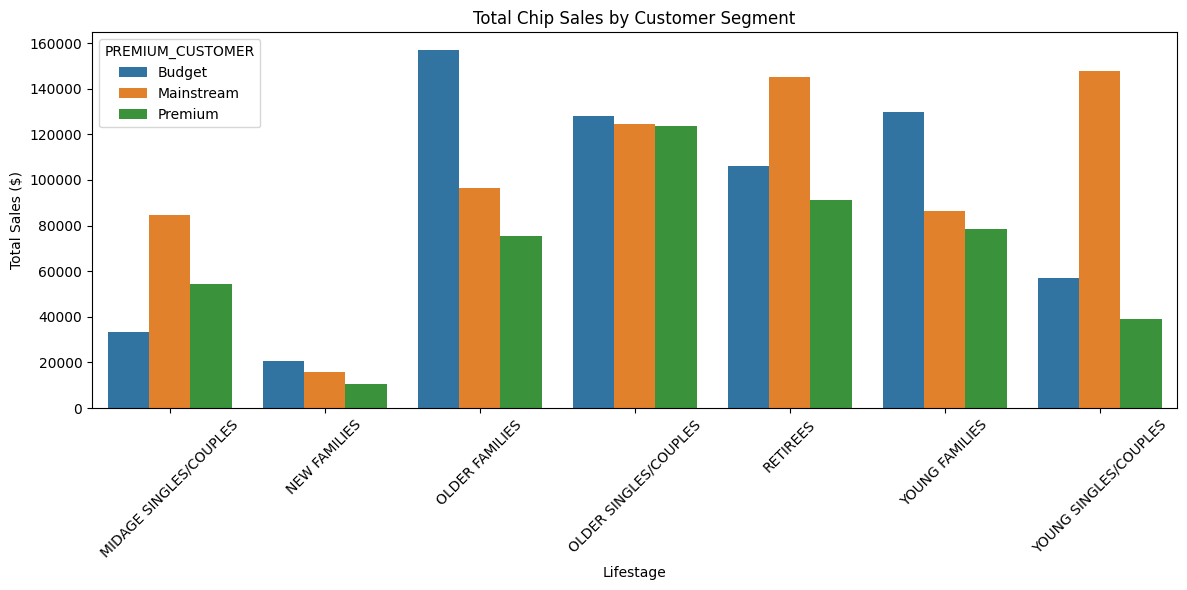

In [29]:
# Calculate the summary of sales by those dimensions and create a plot.

sales_summary = df_combined.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=sales_summary, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title("Total Chip Sales by Customer Segment")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("chip_sales_by_segment.png", dpi=300, bbox_inches='tight')
plt.show()


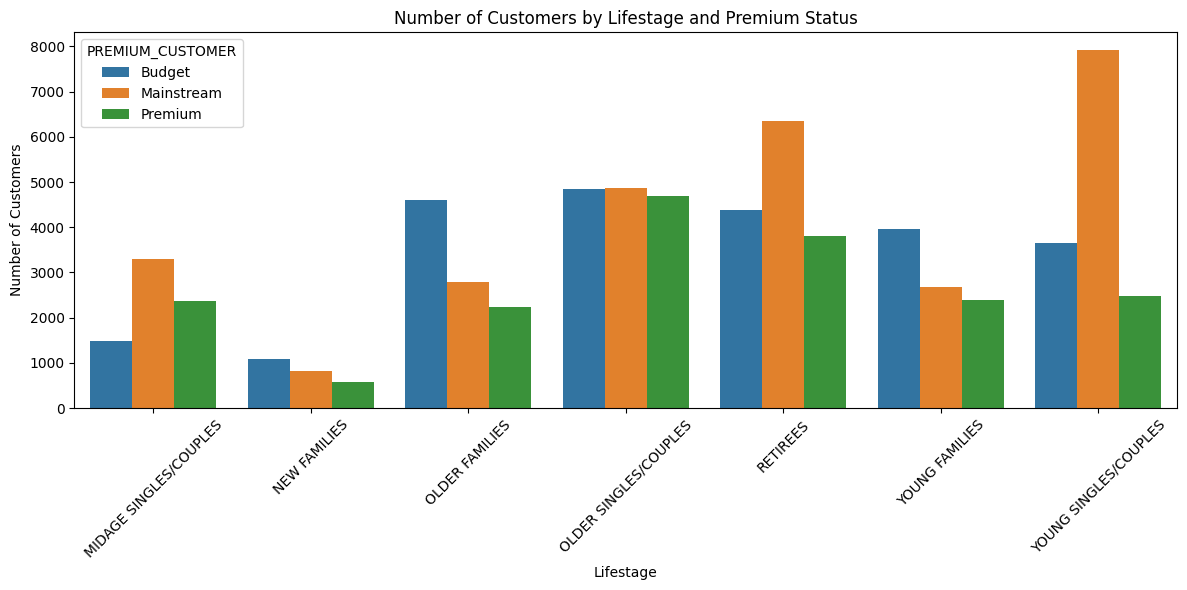

In [30]:
# Drop duplicate customers to count each only once
unique_customers = df_combined[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates()

# Group by LIFESTAGE and PREMIUM_CUSTOMER
customer_counts = unique_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Customer_Count')

plt.figure(figsize=(12,6))
sns.barplot(data=customer_counts, x='LIFESTAGE', y='Customer_Count', hue='PREMIUM_CUSTOMER')
plt.title("Number of Customers by Lifestage and Premium Status")
plt.xlabel("Lifestage")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.savefig("customer_count_by_segment.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


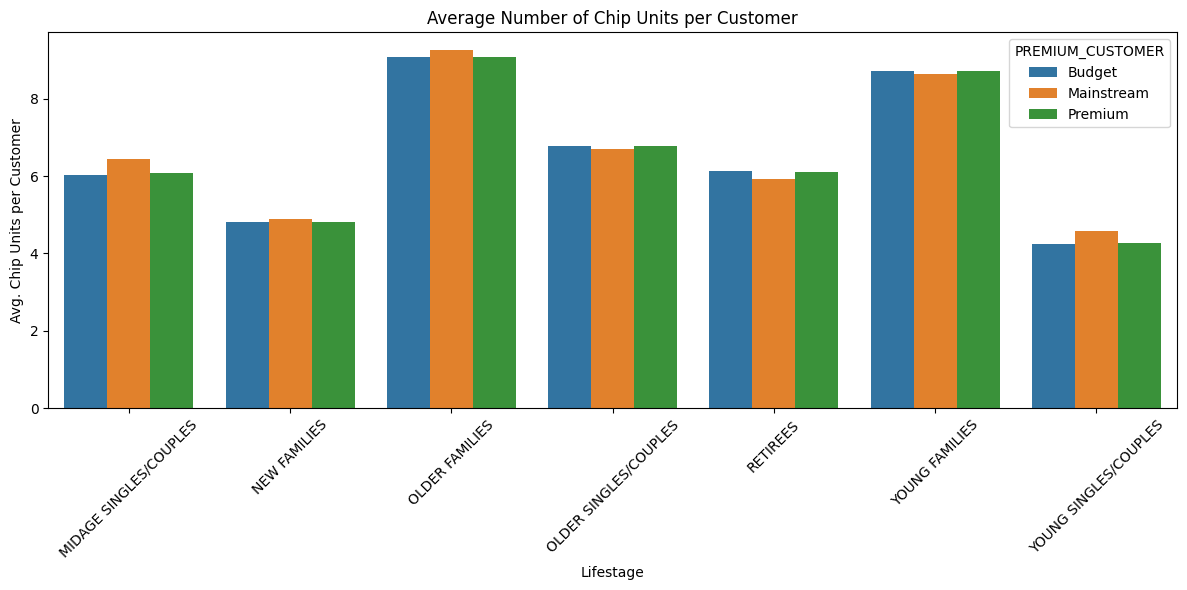

In [31]:
# Calculate and plot the average number of units per customer by those two dimensions.

# Total units bought per customer
units_per_customer = df_combined.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

# Average units per segment
avg_units = units_per_customer.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_units, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER')
plt.title("Average Number of Chip Units per Customer")
plt.xlabel("Lifestage")
plt.ylabel("Avg. Chip Units per Customer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_units_per_customer.png", dpi=300, bbox_inches='tight')
plt.show()


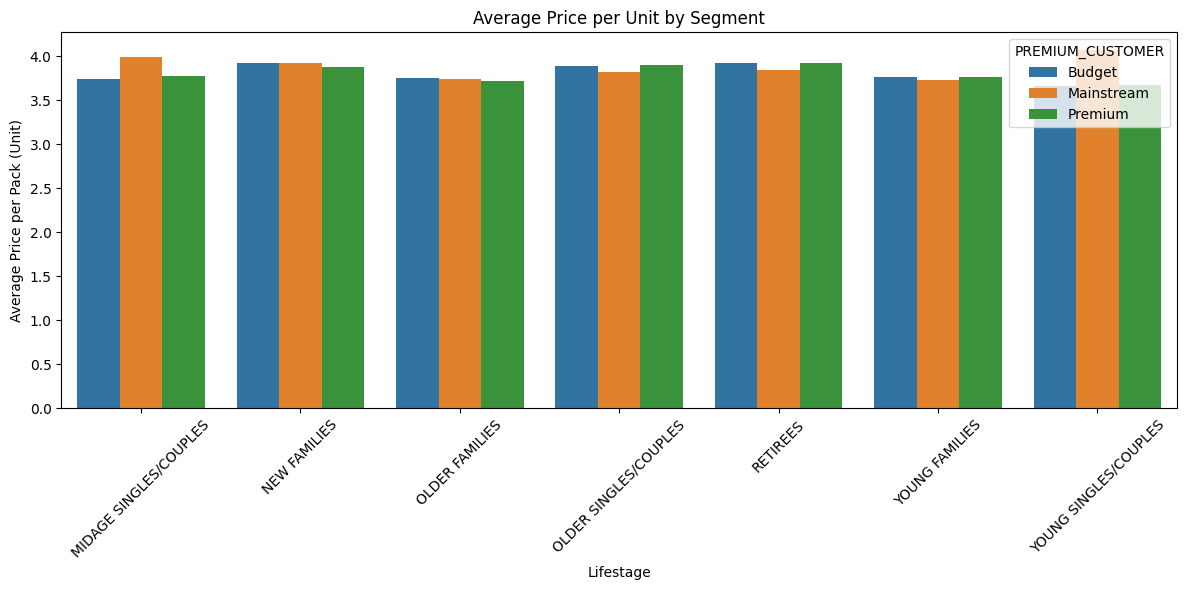

In [32]:
df_combined['UNIT_PRICE'] = df_combined['TOT_SALES'] / df_combined['PROD_QTY']

avg_price = df_combined.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['UNIT_PRICE'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price, x='LIFESTAGE', y='UNIT_PRICE', hue='PREMIUM_CUSTOMER')
plt.title("Average Price per Unit by Segment")
plt.xlabel("Lifestage")
plt.ylabel("Average Price per Pack (Unit)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_price_per_unit_segment.png", dpi=300, bbox_inches='tight')
plt.show()
